In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#To print many statements at the same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
#Import dataset and creating dataframe
df=pd.read_csv("C:\\Users\\Ravi Kumar KM\\Downloads\\Visual Analytics Assignment\\Customer Bank Data.csv")
df.head()
df.tail()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
4009,200004010,Sam,Lewis,Male,64,Scotland,Other,30.Dec.15,19711.66
4010,200004011,Keith,Hughes,Male,52,Scotland,Blue Collar,30.Dec.15,56069.72
4011,200004012,Hannah,Springer,Female,50,Scotland,Other,30.Dec.15,59477.82
4012,200004013,Christian,Reid,Male,51,Scotland,Blue Collar,30.Dec.15,239.45
4013,300004014,Stephen,May,Male,33,Wales,Blue Collar,30.Dec.15,30293.19


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 9 columns):
Customer ID           4014 non-null int64
Name                  4014 non-null object
Surname               4014 non-null object
Gender                4014 non-null object
Age                   4014 non-null int64
Region                4014 non-null object
Job Classification    4014 non-null object
Date Joined           4014 non-null object
Balance               4014 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 282.3+ KB


In [6]:
#To find the number unique values in each variable
df['Customer ID'].nunique(),df['Name'].nunique(),df['Surname'].nunique(),df['Gender'].nunique(),df['Age'].nunique(),
df['Region'].nunique(),df['Job Classification'].nunique(),df['Date Joined'].nunique(),df['Balance'].nunique()

(4014, 172, 150, 2, 49)

(4, 3, 307, 4012)

In [7]:
#Dropping Customer Id, Name , Surname and Date Joined from the dataframe as it containes too many categories
df=df.drop(["Customer ID","Name","Surname","Date Joined"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 5 columns):
Gender                4014 non-null object
Age                   4014 non-null int64
Region                4014 non-null object
Job Classification    4014 non-null object
Balance               4014 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 156.9+ KB


In [8]:
df.describe()

,Age,Balance
count,4014.000000,4014.000000
mean,38.611111,39766.448274
std,9.819121,29859.489192
min,15.000000,11.520000
25%,31.000000,16115.367500
50%,37.000000,33567.330000
75%,45.000000,57533.930000
max,64.000000,183467.700000


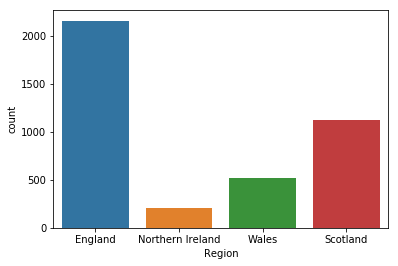

In [10]:
#Univariate Analysis
sns.countplot(x=df['Region'])

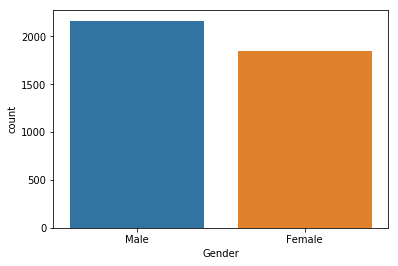

In [11]:
sns.countplot(x=df['Gender'])

Text(0.5,0,'age')

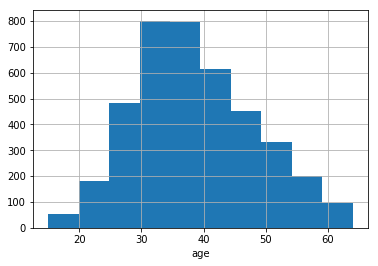

In [13]:
df['Age'].hist()
plt.xlabel('age')

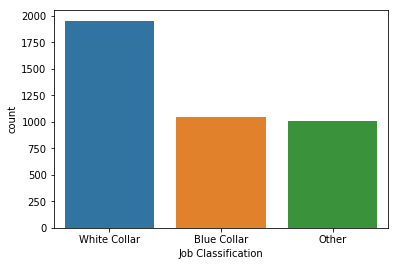

In [14]:
sns.countplot(x=df['Job Classification'])

In [15]:
#Correlation 
df_corr=df.corr()
df_corr

,Age,Balance
Age,1.000000,0.009359
Balance,0.009359,1.000000


<Figure size 432x432 with 0 Axes>

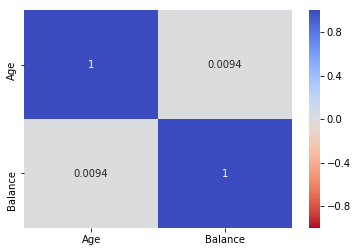

<Figure size 432x432 with 0 Axes>

In [16]:
sns.heatmap(data=df_corr,annot=True,vmin=-1,vmax=1,cmap="coolwarm_r")
plt.figure(figsize=(6,6))

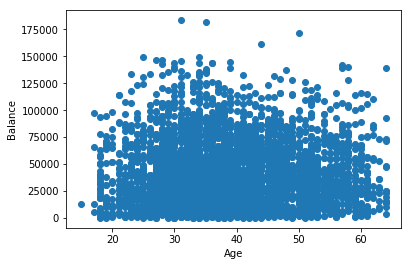

In [17]:
#Age v/s Balance
plt.scatter(x=df["Age"],y=df["Balance"])
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show();

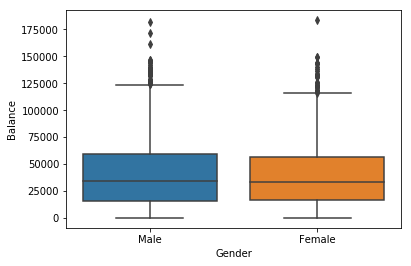

In [18]:
#Gender v/s Balance
sns.boxplot(x=df['Gender'],y=df['Balance'])

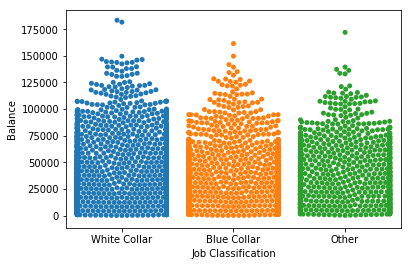

In [19]:
sns.swarmplot(x=df['Job Classification'],y=df['Balance'])

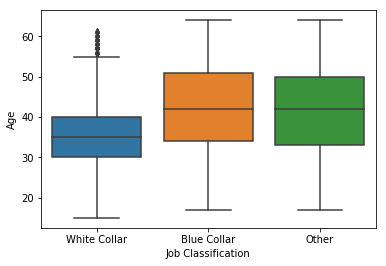

In [21]:
sns.boxplot(x=df['Job Classification'], y=df['Age'])

In [22]:
df.groupby('Job Classification')['Age'].median()
df.groupby('Job Classification')['Age'].mean()

Job Classification
Blue Collar     42
Other           42
White Collar    35
Name: Age, dtype: int64

Job Classification
Blue Collar     41.867493
Other           41.678218
White Collar    35.279284
Name: Age, dtype: float64

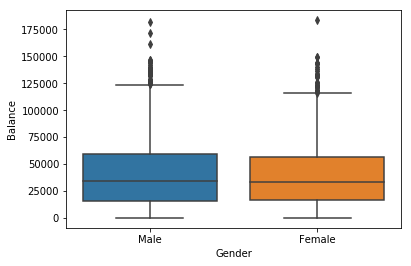

In [23]:
sns.boxplot(x=df['Gender'], y=df['Balance'])

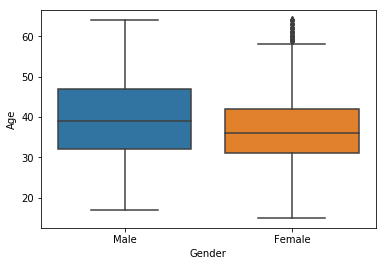

In [24]:
sns.boxplot(x=df['Gender'], y=df['Age'])

In [25]:
job_gen=pd.pivot_table(df,index=['Gender','Region'],columns=['Job Classification'],aggfunc='size')
job_gen

Job Classification       Blue Collar  Other  White Collar
Gender Region                                            
Female England                   163    171           757
       Northern Ireland           29     93            35
       Scotland                   27    263            29
       Wales                      36     57           189
Male   England                   181    143           744
       Northern Ireland           12     12            30
       Scotland                  517    233            55
       Wales                      84     38           116

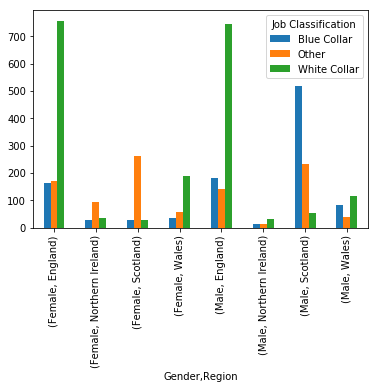

In [26]:
job_gen.plot.bar(stacked=False)
plt.show();

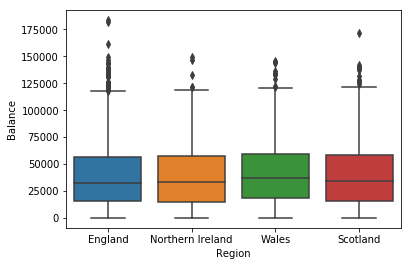

In [27]:
sns.boxplot(x=df['Region'],y=df['Balance'])

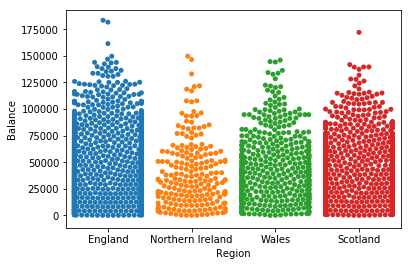

In [28]:
sns.swarmplot(x=df['Region'],y=df['Balance'])

In [29]:
popu=pd.pivot_table(df,index=['Gender'],columns=['Region'],aggfunc='size')
popu

Region,England,Northern Ireland,Scotland,Wales
Gender,,,,
Female,1091,157,319,282
Male,1068,54,805,238


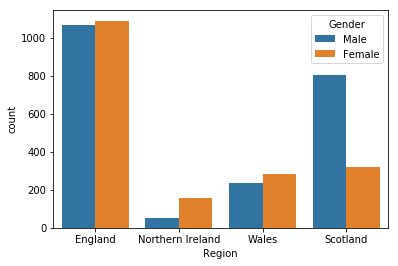

In [30]:
sns.countplot(x=df['Region'],hue=df['Gender'])

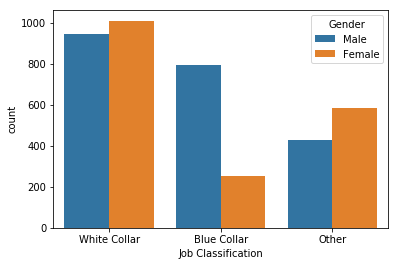

In [31]:
sns.countplot(x=df['Job Classification'],hue=df['Gender'])

In [50]:
job_bal=pd.pivot_table(df,index=['Gender','Region','Job Classification'],values=['Balance'],aggfunc=[np.mean])
job_bal

mean
                                                 Balance
Gender Region           Job Classification              
Female England          Blue Collar         37782.157178
                        Other               41665.655322
                        White Collar        40085.413421
       Northern Ireland Blue Collar         39138.120345
                        Other               39237.491828
                        White Collar        37220.207714
       Scotland         Blue Collar         36853.605185
                        Other               37962.226008
                        White Collar        31780.513793
       Wales            Blue Collar         37777.582222
                        Other               38385.648070
                        White Collar        41375.848413
Male   England          Blue Collar         39275.391602
                        Other               39633.689301
                        White Collar        38210.963589
       Northern Ireland Blue Collar         37545.858333
                        Other               35284.429167
                        White Collar        45826.781333
       Scotland         Blue Collar         39416.145957
                        Other               41453.261974
                        White Collar        44967.737091
       Wales            Blue Collar         44618.743452
                        Other               40183.760263
                        White Collar        46550.531638

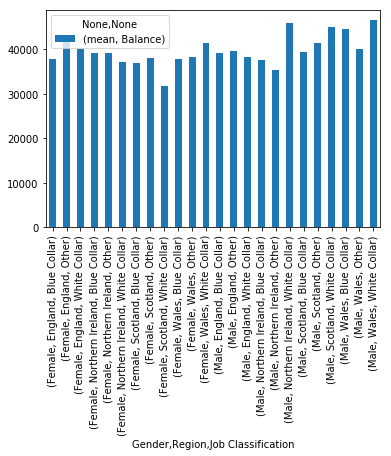

In [51]:
job_bal.plot.bar(stacked=False)
plt.show();

In [35]:
job_age=pd.pivot_table(df,index=['Job Classification'],values=['Age'],aggfunc=[np.mean])
job_age

,mean
,Age
Job Classification,
Blue Collar,41.867493
Other,41.678218
White Collar,35.279284


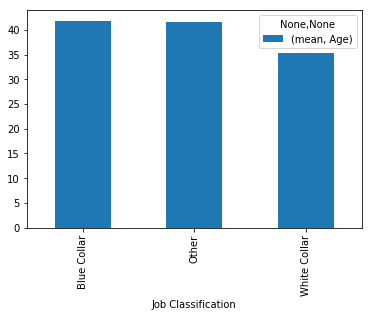

In [36]:
job_age.plot.bar()

In [37]:
job_bal1=pd.pivot_table(df,index=['Gender','Region'],values=['Balance'],aggfunc=[np.median])
job_bal1

median
                           Balance
Gender Region                     
Female England           33307.350
       Northern Ireland  32458.740
       Scotland          33460.570
       Wales             33850.390
Male   England           32287.365
       Northern Ireland  33296.820
       Scotland          34870.840
       Wales             37802.695

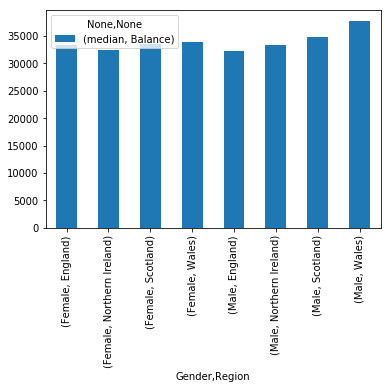

In [38]:
job_bal1.plot.bar()

In [39]:
gen_job=pd.pivot_table(df,index=['Gender'],columns=['Job Classification'],aggfunc='size')
gen_job

Job Classification,Blue Collar,Other,White Collar
Gender,,,
Female,255,584,1010
Male,794,426,945


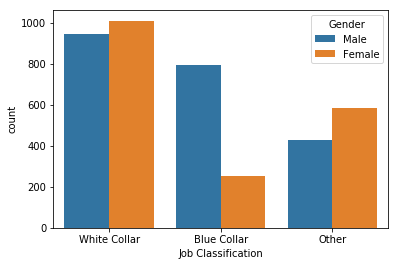

In [42]:
sns.countplot(x=df['Job Classification'],hue=df['Gender'])

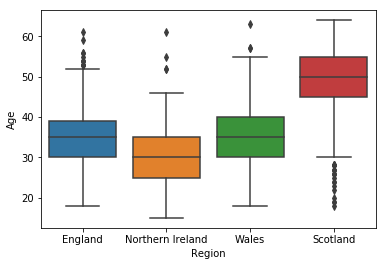

In [43]:
sns.boxplot(x=df['Region'], y=df['Age'])

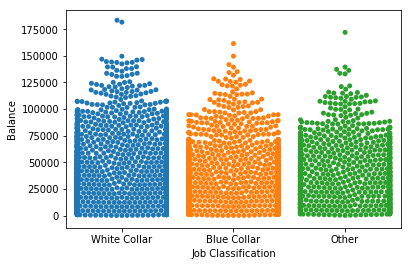

In [44]:
sns.swarmplot(x=df['Job Classification'],y=df['Balance'])

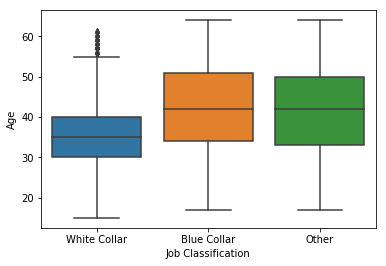

In [45]:
sns.boxplot(x=df['Job Classification'], y=df['Age'])

In [48]:
job_age=pd.pivot_table(df,index=['Gender','Region','Job Classification'],values=['Age'],aggfunc=[np.mean])
job_age

mean
                                                  Age
Gender Region           Job Classification           
Female England          Blue Collar         34.644172
                        Other               35.163743
                        White Collar        34.775429
       Northern Ireland Blue Collar         29.827586
                        Other               30.698925
                        White Collar        30.828571
       Scotland         Blue Collar         50.962963
                        Other               48.817490
                        White Collar        50.620690
       Wales            Blue Collar         33.500000
                        Other               36.543860
                        White Collar        34.671958
Male   England          Blue Collar         34.265193
                        Other               34.377622
                        White Collar        34.951613
       Northern Ireland Blue Collar         28.916667
                        Other               27.916667
                        White Collar        30.266667
       Scotland         Blue Collar         49.077369
                        Other               50.030043
                        White Collar        46.963636
       Wales            Blue Collar         34.559524
                        Other               36.763158
                        White Collar        34.922414

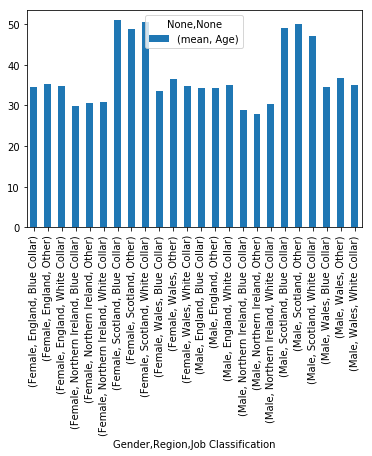

In [49]:
job_age.plot.bar()